In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

# PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
import os
import math

# PYTORCH 
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import transforms, utils

### Import MIDI data 

In [4]:
num_files_desired = 30000

from importMIDI import ImportMIDI 
importedMIDI = ImportMIDI(num_files = num_files_desired)
imported_data_MIDI = importedMIDI.get_midi_data()

[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=100)]: Done   2 tasks      | elapsed:    9.0s
[Parallel(n_jobs=100)]: Done   3 tasks      | elapsed:    9.0s
[Parallel(n_jobs=100)]: Done   4 tasks      | elapsed:    9.1s
[Parallel(n_jobs=100)]: Done   5 tasks      | elapsed:    9.2s
[Parallel(n_jobs=100)]: Done   6 tasks      | elapsed:    9.3s
[Parallel(n_jobs=100)]: Done   7 tasks      | elapsed:    9.4s
[Parallel(n_jobs=100)]: Done   8 tasks      | elapsed:    9.5s
[Parallel(n_jobs=100)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=100)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=100)]: Done  11 tasks      | elapsed:    9.7s
[Parallel(n_jobs=100)]: Done  12 tasks      | elapsed:    9.7s
[Parallel(n_jobs=100)]: Done  13 tasks      | elapsed:    9.8s
[Parallel(n_jobs=100)]: Done  14 tasks      | elapsed:    9.9s
[Parallel(n_jobs=100)]: Done  15 tasks 

### Split MIDI data

In [5]:
num_files = imported_data_MIDI.shape[0]

train_size = 0.80
val_size   = 0.10
test_size  = 0.10

val_index  = math.floor(num_files*train_size)
test_index = math.floor(num_files*(1-test_size))

train_data = imported_data_MIDI.iloc[0:val_index,8]
val_data   = imported_data_MIDI.iloc[val_index:test_index,8]
test_data  = imported_data_MIDI.iloc[test_index:num_files,8]

In [6]:
print(num_files)
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

2376
(1900,)
(238,)
(238,)


### Save data to file 

In [20]:
from datasetToFile import MidiToFile

# train_midi_to_file = MidiToFile(data = train_data, data_type = "train")
val_midi_to_file   = MidiToFile(data = val_data,   data_type = "val")

Length of list:  238
Song index:  0
Song index:  1
Song index:  2
Song index:  3
Song index:  4
Song index:  5
Song index:  6
Song index:  7
Song index:  8
Song index:  9
Song index:  10
Song index:  11
Song index:  12
Song index:  13
Song index:  14
Song index:  15
Song index:  16
Song index:  17
Song index:  18
Song index:  19
Song index:  20
Song index:  21
Song index:  22
Song index:  23
Song index:  24
Song index:  25
Song index:  26
Song index:  27
Song index:  28
Song index:  29
Song index:  30
Song index:  31
Song index:  32
Song index:  33
Song index:  34
Song index:  35
Song index:  36
Song index:  37
Song index:  38
Song index:  39
Song index:  40
Song index:  41
Song index:  42
Song index:  43
Song index:  44
Song index:  45
Song index:  46
Song index:  47
Song index:  48
Song index:  49
Song index:  50
Song index:  51
Song index:  52
Song index:  53
Song index:  54
Song index:  55
Song index:  56
Song index:  57
Song index:  58
Song index:  59
Song index:  60
Song index:  

### Save the network

In [420]:
PATH = './midi_net.pth'
torch.save(net.state_dict(), PATH)

### Validate the network

In [448]:
num_notes = 128

PLAYING_THRESH = 0.05

val_labels = np.zeros((len(valloader.dataset), num_notes))
val_preds  = np.zeros((len(valloader.dataset), num_notes))

with torch.no_grad():
    idx = 0
    for data in valloader:
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        outputs = net(inputs.double())
        outputs = sigmoid(outputs)

        val_labels[idx:idx+labels.shape[0], :] = labels.cpu().numpy()
        val_preds[idx:idx+labels.shape[0], :]  = outputs.cpu().numpy()
        
        idx = idx + labels.shape[0]
 
import copy
val_preds_probs = copy.deepcopy(val_preds)

val_preds[val_preds <  PLAYING_THRESH] = 0
val_preds[val_preds >= PLAYING_THRESH] = 1

### Get network metrics

In [449]:
val_accuracy, val_recall = evaluate_metrics(val_preds, val_labels)

Correct:  356392.0 , Num pos:  3432.0 num true pos:  3134.0 , accuracy:  0.724515352589123 , recall:  0.9131701631701632


In [450]:
print(val_accuracy)
print(val_recall)

0.724515352589123
0.9131701631701632


### PLOTS

In [437]:
def plot_data(x, y): 
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x, y, marker='_')
    plt.xlabel('Time (x0.01 s)')
    plt.ylabel('MIDI Pitch')
#     plt.ylim(top=384)
    plt.show()

### Loss

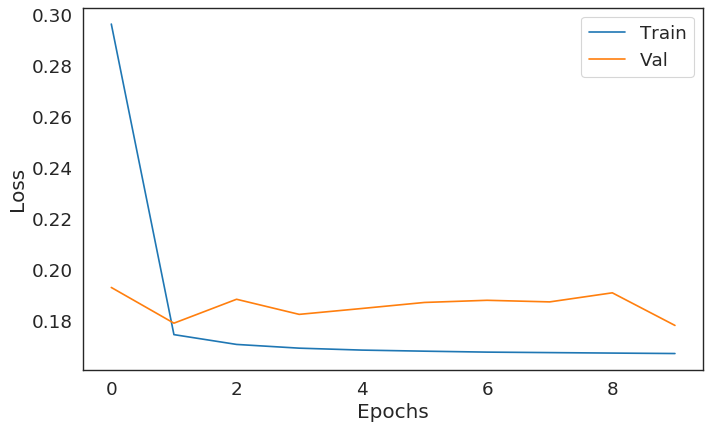

In [438]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_loss_list, label='Train')
plt.plot(val_loss_list,   label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy 

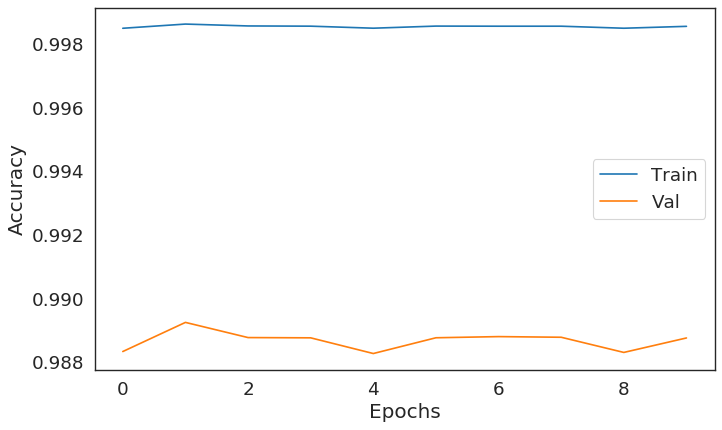

In [439]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_accuracy_list, label='Train')
plt.plot(val_accuracy_list,   label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recall

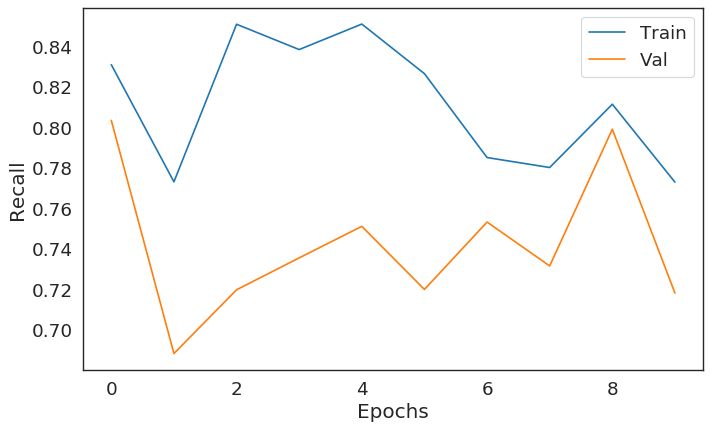

In [440]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_recall_list, label='Train')
plt.plot(val_recall_list,   label='Val')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Val data 

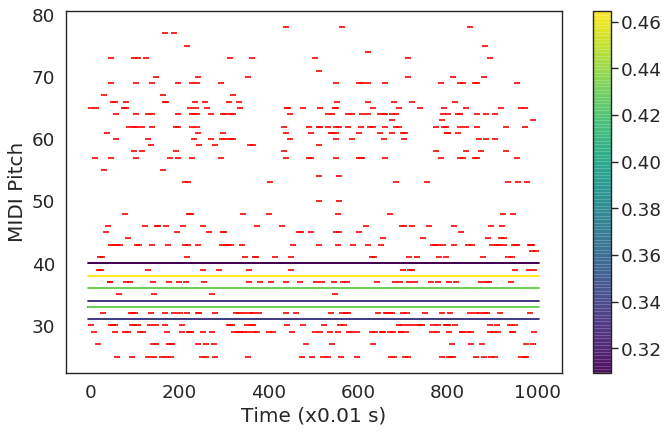

In [441]:
# Labels
val_labels_plt = np.argwhere(val_labels > 0)

# Predictions
val_preds_plt = np.argwhere(val_preds > 0)
val_preds_plt_indices = np.where(val_preds > 0)
val_preds_colors = val_preds_probs[val_preds_plt_indices]

# size_val = val_labels_plt.shape[0]
end_index = 1000
val_labels_end_index = 0
val_preds_end_index = 0

while val_labels_plt[val_labels_end_index,0] < end_index: 
    val_labels_end_index += 1
    
while val_preds_plt[val_preds_end_index,0] < end_index: 
    val_preds_end_index += 1

# Plot
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(val_labels_plt[0:val_labels_end_index,0], val_labels_plt[0:val_labels_end_index,1], marker='_', color='r')
plt.scatter(val_preds_plt[0:val_preds_end_index,0],  val_preds_plt[0:val_preds_end_index,1], marker='_', c=val_preds_colors[0:val_preds_end_index], cmap="viridis", alpha=0.75)
plt.colorbar()
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
# plt.ylim(top=384)
plt.show()



### TEST DATA

In [121]:
PLAYING_THRESH = 0.6

num_notes = 128

test_labels = np.zeros((len(testloader.dataset), num_notes))

sigmoid = torch.nn.Sigmoid()

with torch.no_grad():
    idx = 0
    for data in testloader:
        inputs, labels = data
        test_labels[idx:idx+labels.shape[0], :] = labels.cpu().numpy()
        idx = idx + labels.shape[0]

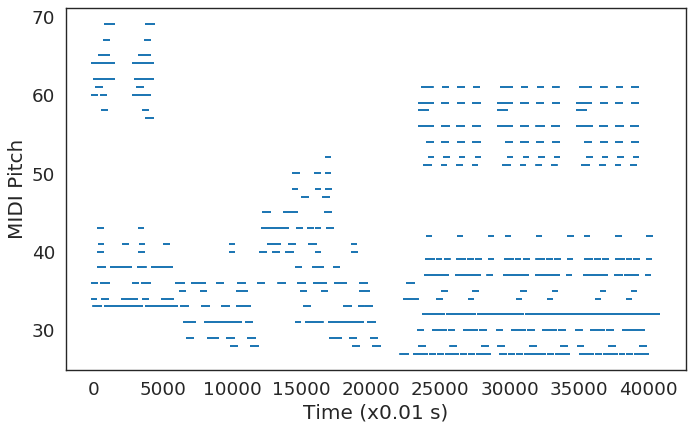

In [125]:
test_labels_plt = np.argwhere(test_labels > 0)

fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(test_labels_plt[:,0], test_labels_plt[:,1], marker='_')
plt.xlabel('Time (x0.01 s)')
plt.ylabel('MIDI Pitch')
# plt.ylim(top=384)
plt.show()


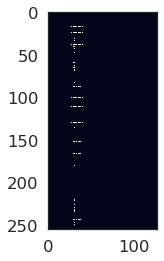

In [155]:
plt.imshow(outputs_np)

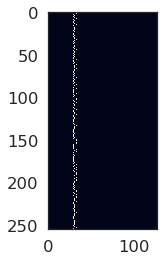

In [156]:
plt.imshow(labels)